## Analysis 2020 Notebook 01 Bio Counts

possible contributing factors (and variables that might confound)?

spatial<br>
temporal

sand composition<br>
sand grain size domain<br>
compaction<br>
beach width

confounding variables...

### Some notes:
- July, 2014 survey completed: 7-14 by: K. Fair and J. Miller <br>
- September, 2014 survey completed: 9-29 by: K. Fair, J. Miller, S. Overman

### Some Preliminary Data Edits:

find:  0:00:00, and replace with: ,

find: ,C  and replace with:  ,Control,C

find: ,T  and replace with:  .Treatment,T

Replace the existing column header line with:<br>
['Bio_ID','Sheet Code','Sample Date','Group','Transect','Sample','Ghost Crabs','Sm Mole Crabs','Med Mole Crabs',
'Lg Mole Crabs','Coquina Clams','Amphipods','Annelids']

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_context('talk')
sns.color_palette('bright')
#sns.set(style="ticks", palette="bright")

%matplotlib inline

In [167]:
data_path = '../../../data/2014_2017_Bio_Counts/'
plot_path = '../../../miscellaneous/Webinar Nov 2020/'
data_file = '2014_2017_BiologicalCounts_ALL.csv'

columns = ['Data Source','Transect','Sample Date','Year','Season','Lat','Lon',
           'Ghost Crabs','Sm Mole Crabs','Med Mole Crabs','Lg Mole Crabs',
           'Coquina Clams','Amphipods','Annelids', 'Totals', 'Total Swash']

ticklabels = ['2014-07','2014-09','2015-04','2015-08','2015-10','2016-02','2016-05','2016-08','2016-10',
             '2017-02','2017-04','2017-08','2020-01','2020-04','2020-07']

## Load the data into a dataframe:

In [14]:
# read data from source file and rework it a bit to get it into shape for anal:
df_ = pd.read_csv(data_path+data_file, sep=',', header=1,
                  names=columns,infer_datetime_format=True)

# convert the date and time string object from the data file to a Py datetime object:
df_['Sample Date'] =  pd.to_datetime(df_['Sample Date'], format='%d-%m-%Y')  #  %H:%M:%S

df_['Sample Date'] = df_["Sample Date"].dt.strftime('%Y-%m')

# set existing datetime column to be new index:
#df_.set_index(['datetime'], drop=False, inplace=True)

# rename the datetime field (column) to Survey to better reflect meaning:
df_.rename({'Sample Date':'Survey'}, axis=1, inplace=True)

# drop unneeded fields--jut to get them out of the way:
#df_ = df_.drop(['Sheet Code','Bio_ID'], axis=1).copy()

# where there might be empty fields, replace with 0.0:
df_.fillna(value=0, inplace=True)

In [15]:
# GROUP TO AGGREGATE (SUM) THE THREE SAMPLES INTO ONE:

# aggregate (sum) each transect's three (3) sample replicates to yield a single total count for
# each transect, for each survey:
df = df_.groupby(['Survey','Transect']).agg({'Ghost Crabs':'sum', 'Sm Mole Crabs':'sum', 
                                            'Med Mole Crabs':'sum', 'Lg Mole Crabs':'sum',
                                             'Coquina Clams':'sum', 'Annelids':'sum', 
                                             'Amphipods':'sum'})

df.reset_index(inplace=True)   # level=['Transect'], 

In [16]:
# add a control - impact (treatment) identifier to df:
df.loc[df['Transect'].str[0] == 'C', 'Group'] = 'Control'
df.loc[df['Transect'].str[0] == 'T', 'Group'] ='Impacted'

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Survey          404 non-null    object
 1   Transect        404 non-null    object
 2   Ghost Crabs     404 non-null    int64 
 3   Sm Mole Crabs   404 non-null    int64 
 4   Med Mole Crabs  404 non-null    int64 
 5   Lg Mole Crabs   404 non-null    int64 
 6   Coquina Clams   404 non-null    int64 
 7   Annelids        404 non-null    int64 
 8   Amphipods       404 non-null    int64 
 9   Group           404 non-null    object
 10  All Mole Crabs  404 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 34.8+ KB


In [155]:
# CREATE A DATETIME OBJECT SAMPLE DATE FROM SURVEY FIELD:
df['Sample Date'] =  pd.to_datetime(df['Survey'], format='%Y-%m')

In [ ]:
df['DateJ'] = pd.DatetimeIndex(df['Sample Date']).floor('d').to_julian_date()+0.5

In [156]:
# ADD A FIELD THAT CONTAINS THE SURVEY DATE AS JULIAN DAYS/DATES:

# add 0.5 to bring date to whole day (Julian dates start counting at mid-day)
df['DateJ'] = pd.DatetimeIndex(df['Sample Date']).floor('d').to_julian_date()+0.5 

In [159]:
# ADD FIELD CONTAINING GREGORIAN DATES (CONVERT FROM JULIAN DATES):
df['DateG'] = pd.to_datetime(df['DateJ']-0.5, unit='D', origin='julian')

In [168]:
xtics = df.DateJ.unique()
xticlbls = ticklabels

In [17]:
# okay, so here's what we have in terms of data to play with:
df.columns

Index(['Survey', 'Transect', 'Ghost Crabs', 'Sm Mole Crabs', 'Med Mole Crabs',
       'Lg Mole Crabs', 'Coquina Clams', 'Annelids', 'Amphipods', 'Group'],
      dtype='object')

### Histograms:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


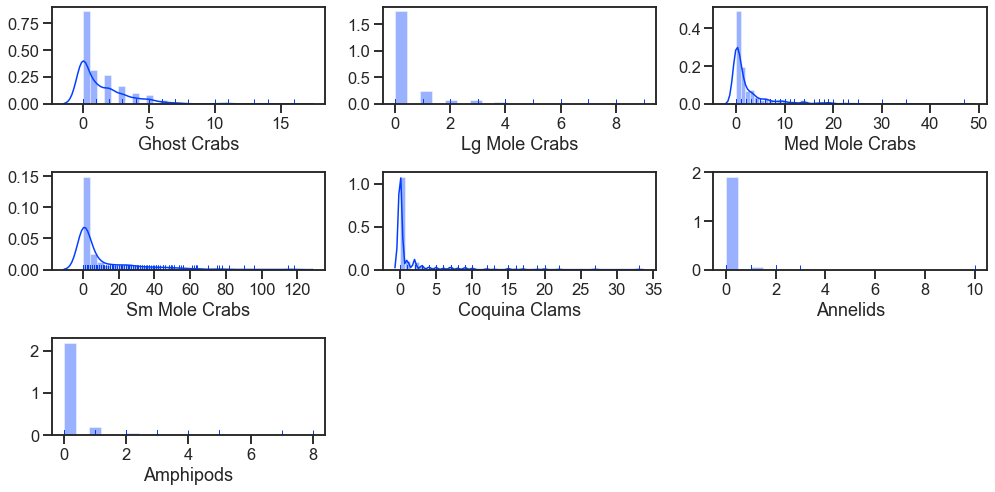

In [18]:
# let's do some quick 
fig01 = plt.figure(figsize=(14,7))
ax00 = fig01.add_subplot(3,3,1)
ax01 = fig01.add_subplot(3,3,2)
ax02 = fig01.add_subplot(3,3,3)
ax03 = fig01.add_subplot(3,3,4)
ax04 = fig01.add_subplot(3,3,5)
ax05 = fig01.add_subplot(3,3,6)
ax06 = fig01.add_subplot(3,3,7)

sns.distplot(a=df['Ghost Crabs'], ax=ax00, rug=True)
sns.distplot(a=df['Lg Mole Crabs'], ax=ax01, rug=True)
sns.distplot(a=df['Med Mole Crabs'], ax=ax02, rug=True)
sns.distplot(a=df['Sm Mole Crabs'], ax=ax03, rug=True)
sns.distplot(a=df['Coquina Clams'], ax=ax04, rug=True)
sns.distplot(a=df['Annelids'], ax=ax05, rug=True)
sns.distplot(a=df['Amphipods'], ax=ax06, rug=True)

#plt.xticks(rotation=45
# plt.suptitle('Histograms w/KDEs for each species count')
plt.tight_layout();

In [19]:
# SUMMARY - LOOKING A QUANTILE LOADS:

df.describe()

,Ghost Crabs,Sm Mole Crabs,Med Mole Crabs,Lg Mole Crabs,Coquina Clams,Annelids,Amphipods
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.532178,11.069307,2.784653,0.492574,1.591584,0.084158,0.245050
std,2.192125,19.059790,5.323823,1.265085,4.025851,0.579078,0.872434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000
max,16.000000,118.000000,47.000000,9.000000,33.000000,10.000000,8.000000


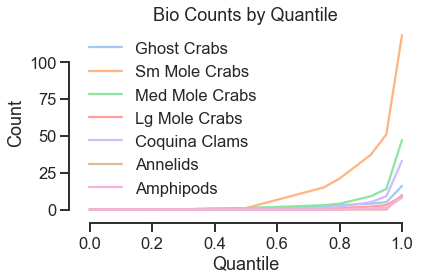

In [91]:
# A CLOSER LOOK AT THE COUNT DISTRIBUTION BY QUANTILE (PLOT):

animals = ['Ghost Crabs','Lg Mole Crabs','Med Mole Crabs','Sm Mole Crabs','Coquina Clams',
           'Annelids','Amphipods']

# upper quantiles:
quants = df.quantile([.0, .25, .5, .75, .8, .9, .95, 1])
quants.plot()
sns.despine(offset=5, trim=True)
plt.xlabel('Quantile')
plt.ylabel('Count')
plt.legend(frameon=False)
plt.title('Bio Counts by Quantile')
plt.tight_layout()
plt.savefig(plot_path+'BioCntQuantiles.png');

In [48]:
# A CLOSER LOOK AT THE COUNT DISTRIBUTION BY QUANTILE (TABLE):

df.quantile([.0, .25, .5, .75, .8, .9, .95, 1])

,Ghost Crabs,Sm Mole Crabs,Med Mole Crabs,Lg Mole Crabs,Coquina Clams,Annelids,Amphipods
0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.50,1.0,1.00,1.0,0.0,0.0,0.0,0.0
0.75,2.0,15.00,3.0,0.0,1.0,0.0,0.0
0.80,3.0,21.00,4.0,1.0,2.0,0.0,0.0
0.90,4.0,37.00,9.0,2.0,5.0,0.0,1.0
0.95,5.0,50.85,14.0,3.0,9.0,0.0,1.0
1.00,16.0,118.00,47.0,9.0,33.0,10.0,8.0


In [10]:
# ONE COMMON TAKE ON OUTLIER DETECTION: 3 x standard deviation:
df.std()*3

Ghost Crabs        6.576376
Sm Mole Crabs     57.179369
Med Mole Crabs    15.971468
Lg Mole Crabs      3.795256
Coquina Clams     12.077552
Annelids           1.737235
Amphipods          2.617303
dtype: float64

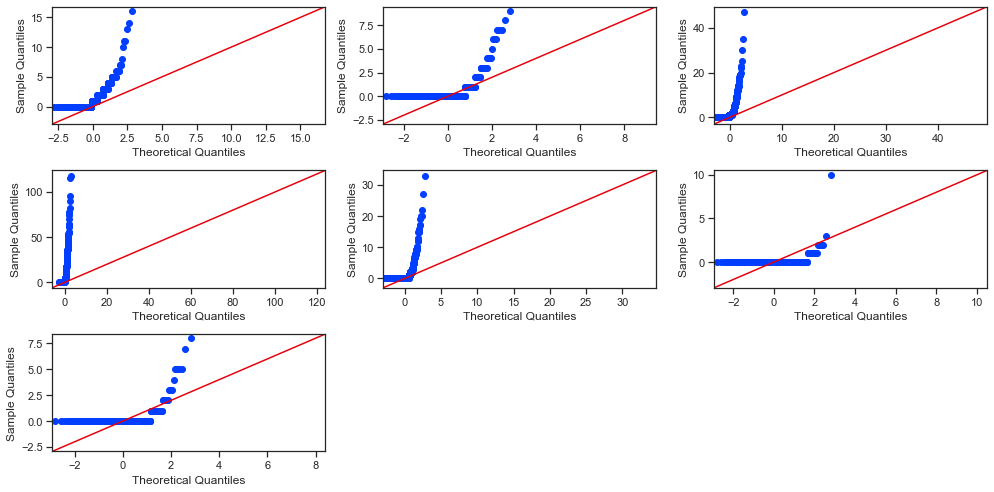

In [21]:
# QQ-PLOTS:

import statsmodels.api as sm

fig02 = plt.figure(figsize=(14,7))
ax00 = fig02.add_subplot(3,3,1)
ax01 = fig02.add_subplot(3,3,2)
ax02 = fig02.add_subplot(3,3,3)
ax03 = fig02.add_subplot(3,3,4)
ax04 = fig02.add_subplot(3,3,5)
ax05 = fig02.add_subplot(3,3,6)
ax06 = fig02.add_subplot(3,3,7)

sm.qqplot(df['Ghost Crabs'], line='45', ax=ax00, label='Ghost Crabs')
sm.qqplot(df['Lg Mole Crabs'], line='45', ax=ax01)
sm.qqplot(df['Med Mole Crabs'], line='45', ax=ax02)
sm.qqplot(df['Sm Mole Crabs'], line='45', ax=ax03)
sm.qqplot(df['Coquina Clams'], line='45', ax=ax04)
sm.qqplot(df['Annelids'], line='45', ax=ax05)
sm.qqplot(df['Amphipods'], line='45', ax=ax06)

plt.tight_layout();

<ipython-input-22-b1cdb3d874ae>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax00 = fig03.add_subplot(3,3,1)


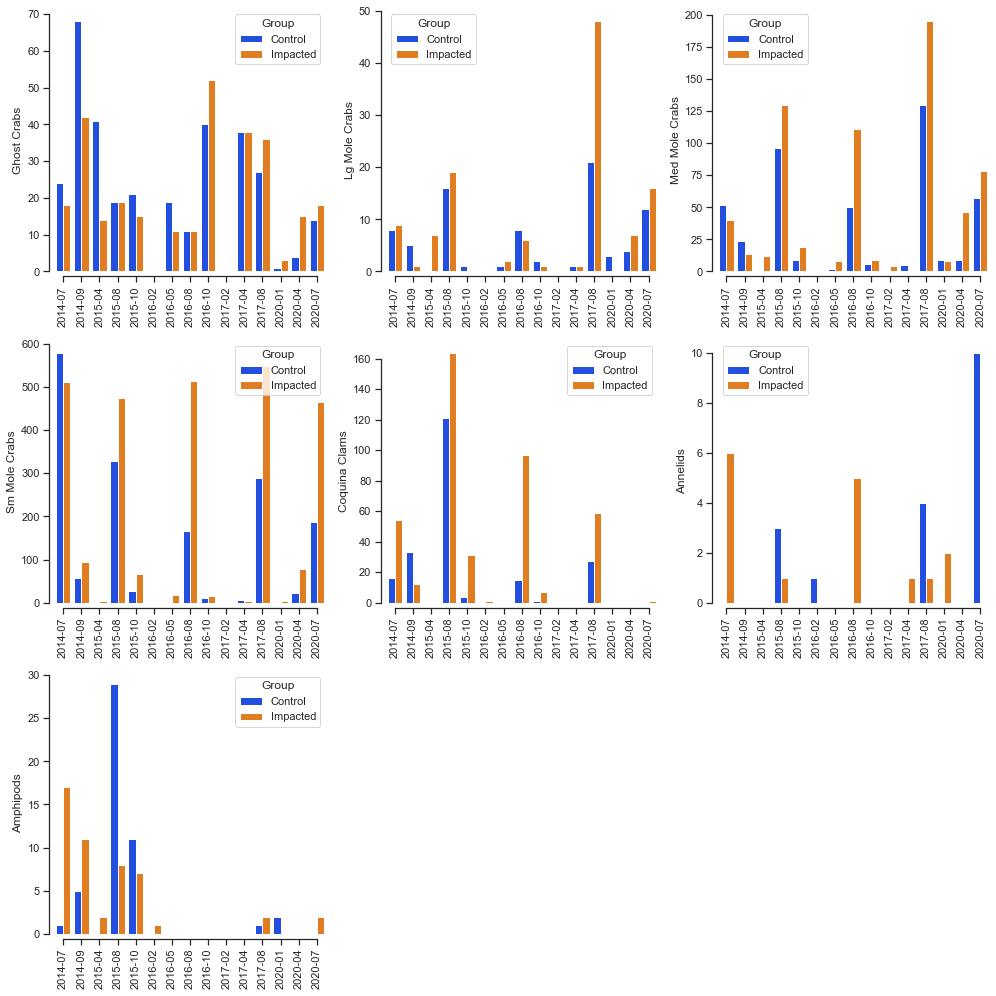

In [22]:
# BAR PLOTS: COUNTS:

fig03 = plt.figure(figsize=(14,14))
ax00 = fig03.add_subplot(3,3,1)
ax00 = fig03.add_subplot(3,3,1)
ax01 = fig03.add_subplot(3,3,2)
ax02 = fig03.add_subplot(3,3,3)
ax03 = fig03.add_subplot(3,3,4)
ax04 = fig03.add_subplot(3,3,5)
ax05 = fig03.add_subplot(3,3,6)
ax06 = fig03.add_subplot(3,3,7)


sns.barplot(x='Survey', y='Ghost Crabs', hue='Group', data=df, estimator=sum, ci=None, ax=ax00)
sns.barplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df, estimator=sum, ci=None, ax=ax01)
sns.barplot(x='Survey', y='Med Mole Crabs', hue='Group', data=df, estimator=sum, ci=None, ax=ax02)
sns.barplot(x='Survey', y='Sm Mole Crabs', hue='Group', data=df, estimator=sum, ci=None, ax=ax03)
sns.barplot(x='Survey', y='Coquina Clams', hue='Group', data=df, estimator=sum, ci=None, ax=ax04)
sns.barplot(x='Survey', y='Annelids', hue='Group', data=df, estimator=sum, ci=None, ax=ax05)
sns.barplot(x='Survey', y='Amphipods', hue='Group', data=df, estimator=sum, ci=None, ax=ax06)

axes = [ax00,ax01,ax02,ax03,ax04,ax05,ax06]
sns.despine(offset=5, trim=True)
# rotate all xticklabels 45 degrees
for axis in axes:
    plt.setp(axis.get_xticklabels(), rotation=90)

# remove the x axis label from each plot:
for axis in axes:
    axis.set_xlabel('')

# plt.suptitle('Species Counts - Control vs Impact Sites (2014 - 2020)')
plt.tight_layout();

In [23]:
# ChECKING THE BAR VALUES:
print( df['Sm Mole Crabs'].loc[(df['Survey'] == '2014-07') & (df['Group'] == 'Control')] )
print( df['Sm Mole Crabs'].loc[(df['Survey'] == '2014-07') & (df['Group'] == 'Control')].sum() )

# df.groupby(['Survey', 'Group']).sum()

0      17
1      61
2      75
3      51
4      34
5     115
6       0
7     118
8      23
9      30
10     56
Name: Sm Mole Crabs, dtype: int64
580


In [24]:
# NORMALIZED DATA GROUPING ON SURVEY AND TRANSECT GROUP:

from sklearn import preprocessing

# Sum counts by survey and group:
df_t = df.groupby(['Survey', 'Group']).sum()
df_t.reset_index(inplace=True)

# create numpy array of counts (only) and normalize (0,1)
x = df_t.drop(['Survey','Group'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.columns=['Ghost Crabs','Lg Mole Crabs','Med Mole Crabs','Sm Mole Crabs','Coquina Clams',
           'Annelids','Amphipods']

# recover row identifiers to install in normed dataframe:
df_prefix = df_t[['Survey','Group']].copy()

df_norm = pd.concat([df_prefix, df_norm], axis=1).copy()
#df_norm

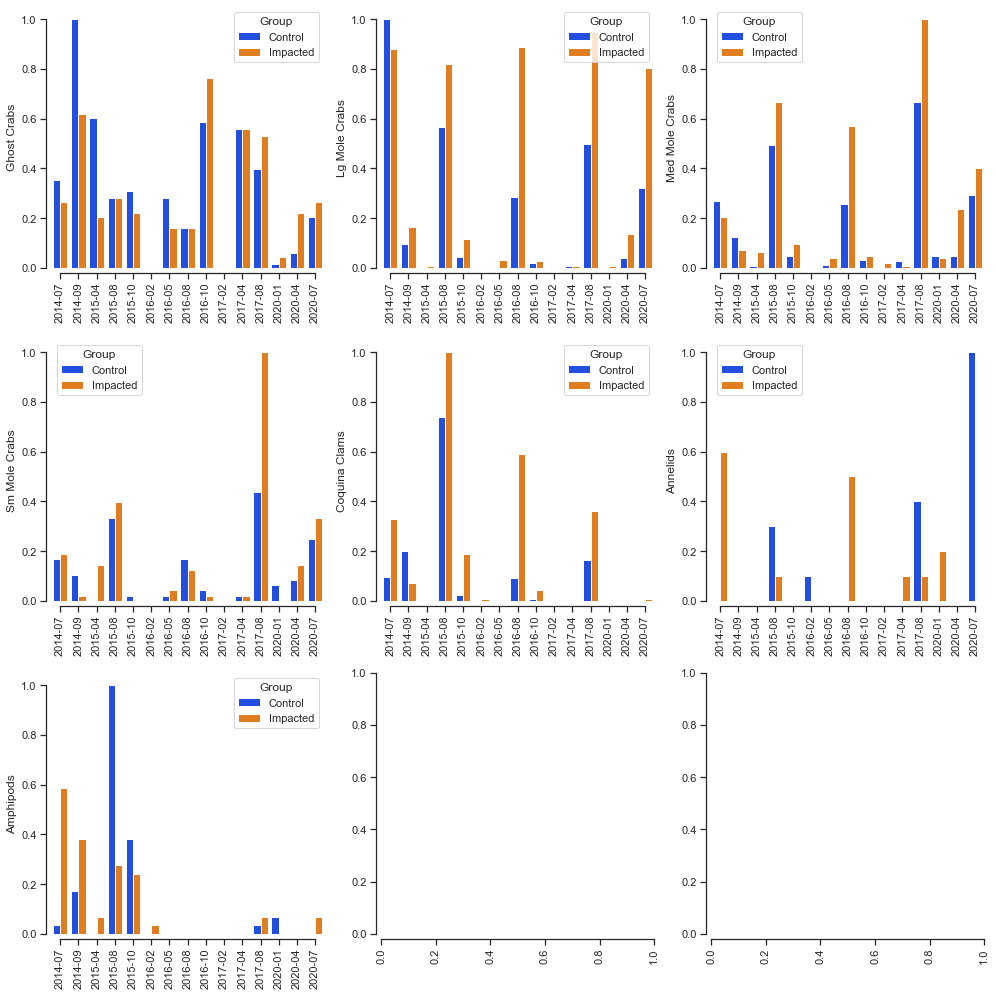

In [25]:
# BAR PLOTS NORMALIZED DATA:

fig4 = plt.figure(figsize=(14,14))
axs = fig4.subplots(nrows=3, ncols=3)

sns.barplot(x='Survey', y='Ghost Crabs', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[0][0])
sns.barplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[0][1])
sns.barplot(x='Survey', y='Med Mole Crabs', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[0][2])
sns.barplot(x='Survey', y='Sm Mole Crabs', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[1][0])
sns.barplot(x='Survey', y='Coquina Clams', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[1][1])
sns.barplot(x='Survey', y='Annelids', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[1][2])
sns.barplot(x='Survey', y='Amphipods', hue='Group', data=df_norm, estimator=sum, ci=None, ax=axs[2][0])

sns.despine(offset=5, trim=True)
# rotate all xticklabels 45 degrees
for i in range(0,3):
    for j in range(0,3):
        plt.setp(axs[i][j].get_xticklabels(), rotation=90)
        axs[i][j].set_xlabel('')

plt.tight_layout();

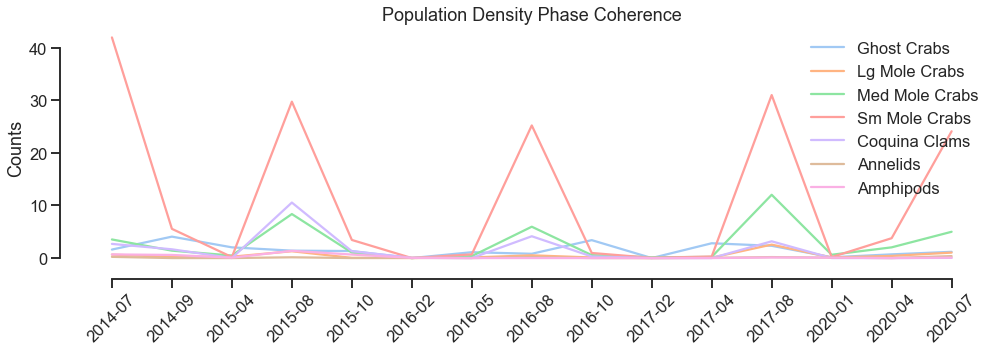

In [107]:
# COHERENCE:

fig5 = plt.figure(figsize=(14,5))
axs = fig5.subplots(nrows=1, ncols=1)

sns.lineplot(x='Survey', y='Ghost Crabs', data=df, ci=None, dashes=True, markers=True, label='Ghost Crabs')
sns.lineplot(x='Survey', y='Lg Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Lg Mole Crabs')
sns.lineplot(x='Survey', y='Med Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Med Mole Crabs')
sns.lineplot(x='Survey', y='Sm Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Sm Mole Crabs')
sns.lineplot(x='Survey', y='Coquina Clams', data=df, ci=None, dashes=True, markers=True, label='Coquina Clams')
sns.lineplot(x='Survey', y='Annelids', data=df, ci=None, dashes=True, markers=True, label='Annelids')
sns.lineplot(x='Survey', y='Amphipods', data=df, ci=None, dashes=True, markers=True, label='Amphipods')

sns.despine(offset=10, trim=True)

# Rotate the tick labels and set their alignment.
plt.xticks(rotation=45)

plt.xlabel('')
plt.ylabel('Counts')
plt.title('Population Density Phase Coherence')
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'Phase Coherence Overall.png');

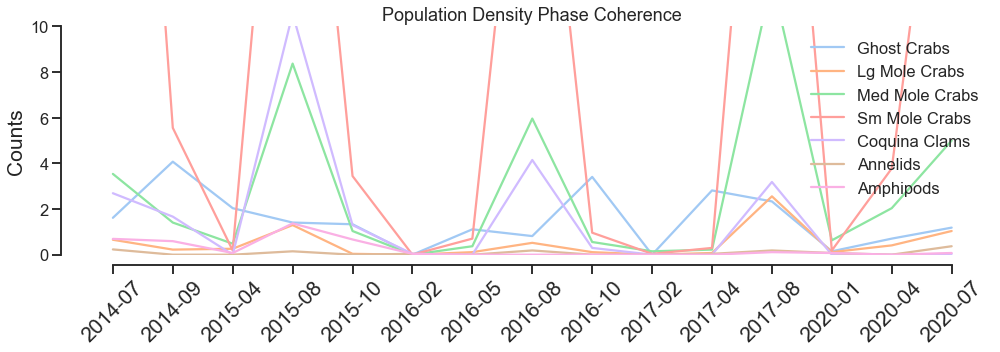

In [108]:
fig6 = plt.figure(figsize=(14,5))
ax00 = fig6.subplots(nrows=1, ncols=1)

sns.lineplot(x='Survey', y='Ghost Crabs', data=df, ci=None, dashes=True, markers=True, label='Ghost Crabs')
sns.lineplot(x='Survey', y='Lg Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Lg Mole Crabs')
sns.lineplot(x='Survey', y='Med Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Med Mole Crabs')
sns.lineplot(x='Survey', y='Sm Mole Crabs', data=df, ci=None, dashes=True, markers=True, label='Sm Mole Crabs')
sns.lineplot(x='Survey', y='Coquina Clams', data=df, ci=None, dashes=True, markers=True, label='Coquina Clams')
sns.lineplot(x='Survey', y='Annelids', data=df, ci=None, dashes=True, markers=True, label='Annelids')
sns.lineplot(x='Survey', y='Amphipods', data=df, ci=None, dashes=True, markers=True, label='Amphipods')
plt.ylim(0, 10)
sns.despine(offset=10, trim=True)

plt.xlabel('')
plt.ylabel('Counts', fontsize=21)
plt.title('Population Density Phase Coherence')
plt.legend(loc='best', frameon=False)
plt.xticks(fontsize=21, rotation=45)
plt.tight_layout()
plt.savefig(plot_path+'Phase Coherence Close.png');

In [28]:
# NORMALIZE DATA W/O GROUPING:

from sklearn import preprocessing

x = df.drop(['Survey','Transect','Group'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm2 = pd.DataFrame(x_scaled)
df_norm2.columns=['Ghost Crabs','Lg Mole Crabs','Med Mole Crabs','Sm Mole Crabs','Coquina Clams',
                  'Annelids','Amphipods']

# recover row identifiers to install in normed dataframe:
df_prefix = df_t[['Survey','Group']].copy()

df_norm2 = pd.concat([df_prefix, df_norm2], axis=1).copy()
#df_norm2

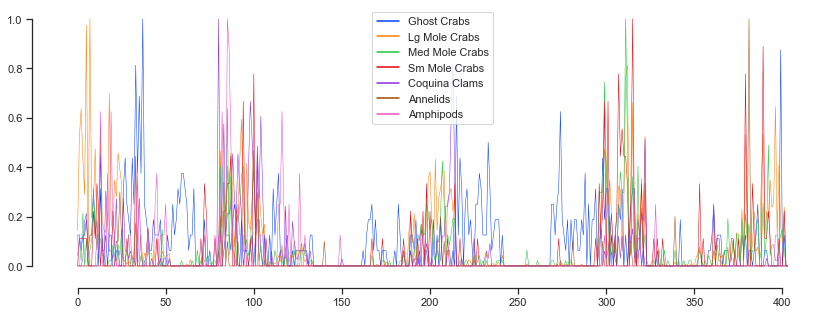

In [29]:
fig7 = plt.figure(figsize=(14,5))
ax00 = fig7.subplots(nrows=1, ncols=1)

sns.set_style('ticks')
sns.lineplot(data=df_norm2.drop(['Survey','Group'], axis=1), dashes=False, ax=ax00, lw=0.5)
sns.despine(offset=10, trim=True);

In [20]:
df['Amphipods'].loc[(df['Survey'] == '2014-07') & (df['Group'] == 'Control')].sum()

1

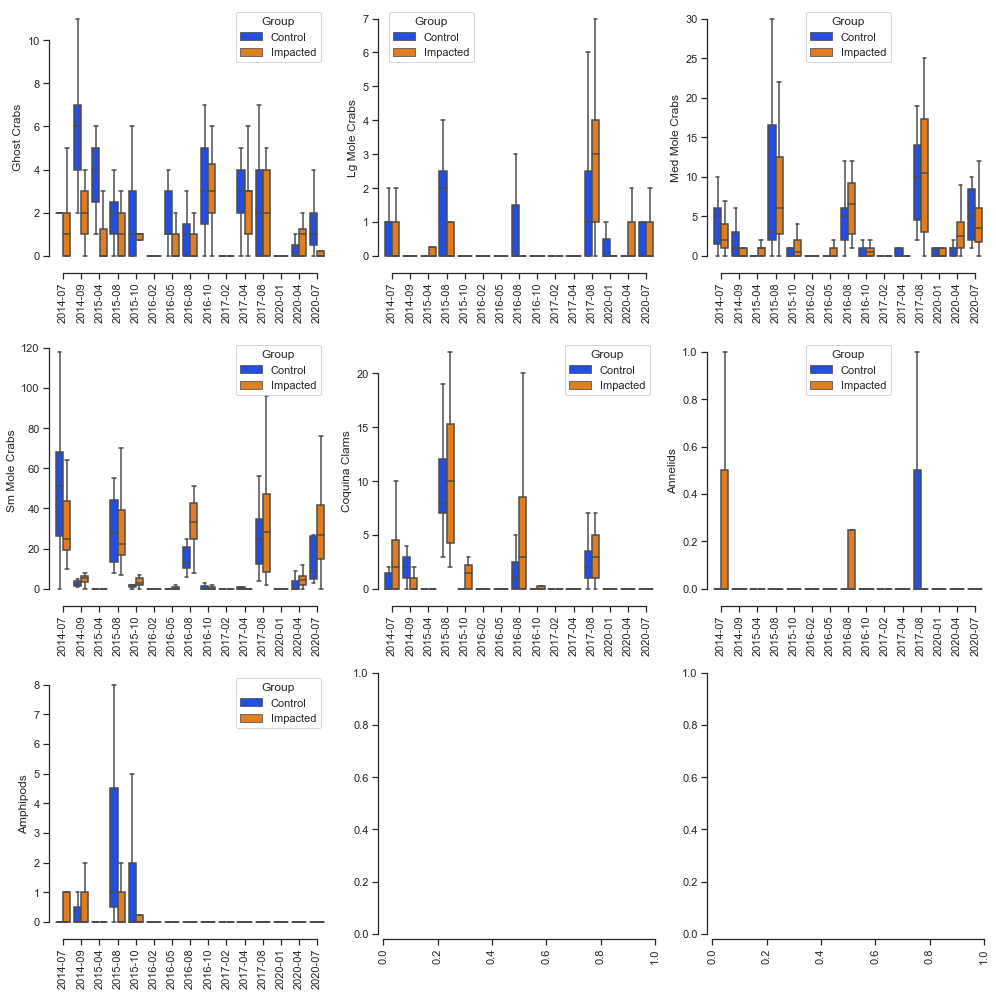

In [30]:
# BOXPLOTS:
fig8 = plt.figure(figsize=(14,14))
axs = fig8.subplots(nrows=3, ncols=3)

sns.boxplot(x='Survey', y='Ghost Crabs', hue='Group', data=df, ax=axs[0][0], showfliers=False)
sns.boxplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df, ax=axs[0][1], showfliers=False)
sns.boxplot(x='Survey', y='Med Mole Crabs', hue='Group', data=df, ax=axs[0][2], showfliers=False)
sns.boxplot(x='Survey', y='Sm Mole Crabs', hue='Group', data=df, ax=axs[1][0], showfliers=False)
sns.boxplot(x='Survey', y='Coquina Clams', hue='Group', data=df, ax=axs[1][1], showfliers=False)
sns.boxplot(x='Survey', y='Annelids', hue='Group', data=df, ax=axs[1][2], showfliers=False)
sns.boxplot(x='Survey', y='Amphipods', hue='Group', data=df, ax=axs[2][0], showfliers=False)

#axes = [axs[0][0],ax01,ax02,ax03,ax04,ax05,ax06]
sns.despine(offset=5, trim=True)
# rotate all xticklabels 90 degrees
for i in range(0,3):
    for j in range(0,3):
        plt.setp(axs[i][j].get_xticklabels(), rotation=90)
        axs[i][j].set_xlabel('')

# plt.suptitle('Species Counts - Control vs Impact Sites (2014 - 2020)')
plt.tight_layout();

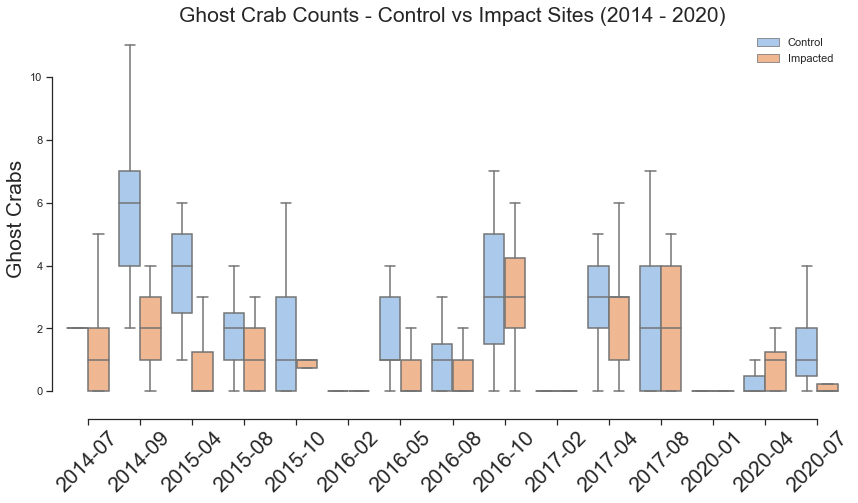

In [112]:
# A CLOSE LOOK AT THE GHOST CRABS:

fig9 = plt.figure(figsize=(14,7))
ax00 = fig9.add_subplot(1,1,1)
sns.set(style="ticks", palette="pastel")

sns.boxplot(x='Survey', y='Ghost Crabs', hue='Group', data=df, ax=ax00, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Ghost Crabs', fontsize=21)
plt.title('Ghost Crab Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Ghost Crabs.png');

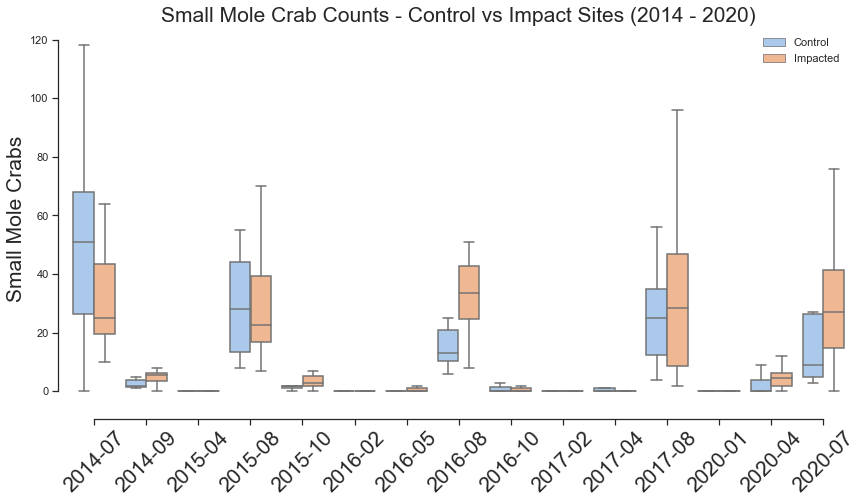

In [113]:
# A CLOSE LOOK AT THE SMALL MOLE CRABS:

fig10 = plt.figure(figsize=(14,7))
ax00 = fig10.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Sm Mole Crabs', hue='Group', data=df, ax=ax00, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Small Mole Crabs', fontsize=21)
plt.title('Small Mole Crab Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Small Mole Crabs.png');

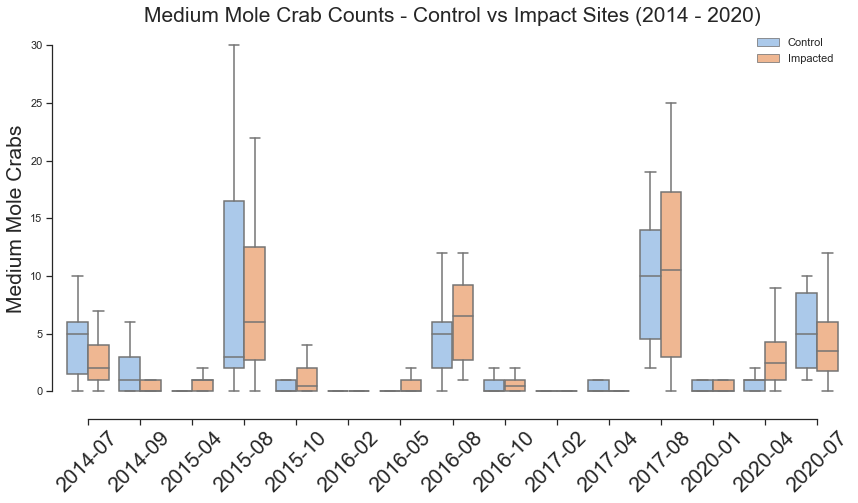

In [114]:
# A CLOSE LOOK AT THE MEDIUM MOLE CRABS:

fig10 = plt.figure(figsize=(14,7))
ax00 = fig10.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Med Mole Crabs', hue='Group', data=df, ax=ax00, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Medium Mole Crabs', fontsize=21)
plt.title('Medium Mole Crab Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Medium Mole Crabs.png');

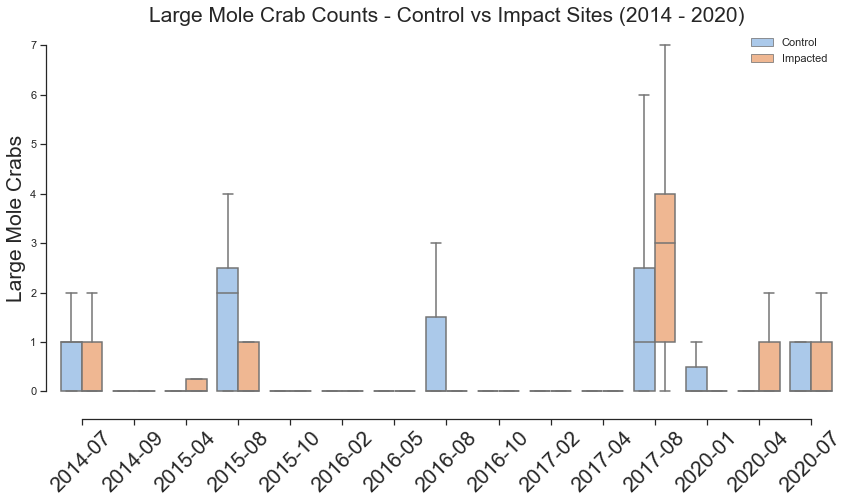

In [115]:
# A CLOSE LOOK AT THE Large MOLE CRABS:

fig10 = plt.figure(figsize=(14,7))
ax00 = fig10.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df, ax=ax00, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Large Mole Crabs', fontsize=21)
plt.title('Large Mole Crab Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Large Mole Crabs.png');

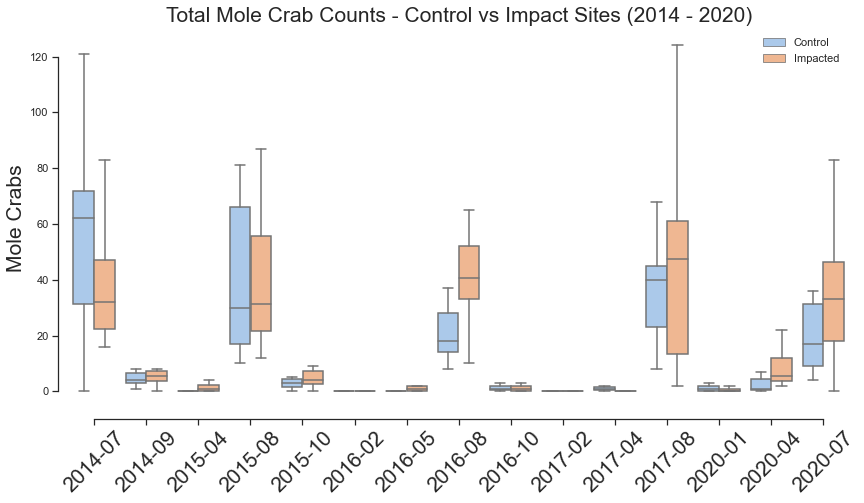

In [116]:
# WHAT IF WE MERGE THE MOLES?:

df['All Mole Crabs'] = df['Sm Mole Crabs'] + df['Med Mole Crabs'] + df['Lg Mole Crabs']

fig11 = plt.figure(figsize=(14,7))
ax00 = fig11.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='All Mole Crabs', hue='Group', data=df, ax=ax00, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Mole Crabs', fontsize=21)
plt.title('Total Mole Crab Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Total Mole Crabs.png');

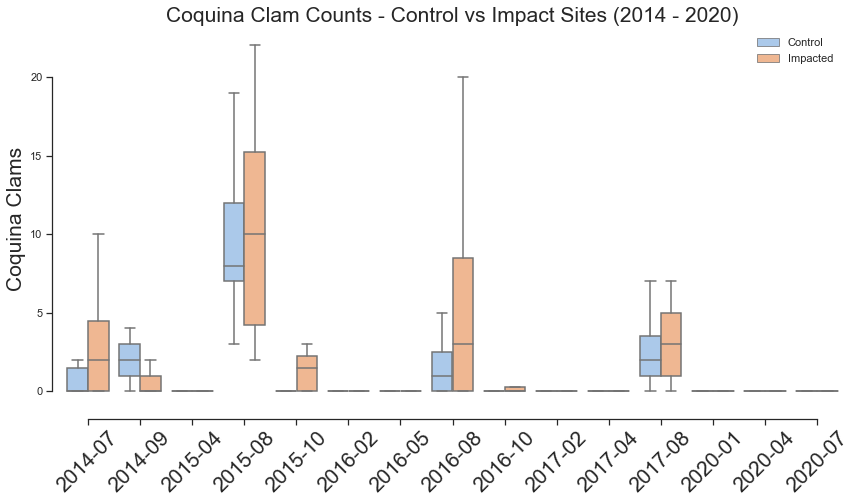

In [142]:
# THE COQUINA CLAMS:

fig12 = plt.figure(figsize=(14,7))
ax00 = fig12.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Coquina Clams', hue='Group', data=df, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)

plt.xlabel('')
plt.ylabel('Coquina Clams', fontsize=21)
plt.title('Coquina Clam Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Coquina Clams.png');

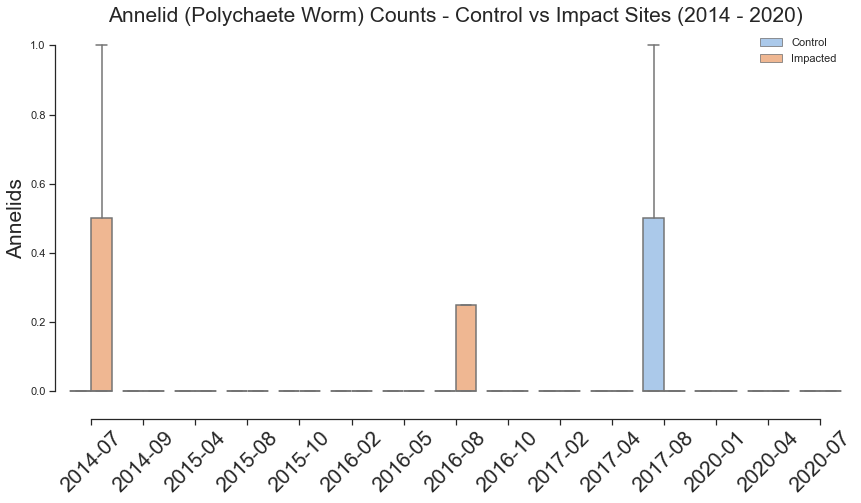

In [143]:
# THE ANNELIDS:
fig13 = plt.figure(figsize=(14,7))
ax00 = fig13.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Annelids', hue='Group', data=df, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Annelids', fontsize=21)
plt.title('Annelid (Polychaete Worm) Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Annelids.png');

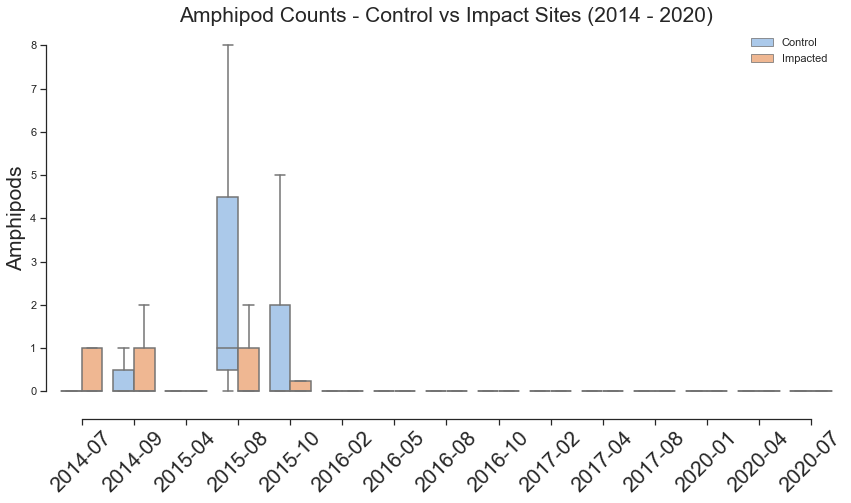

In [144]:
# THE AMPHIPODS:
fig14 = plt.figure(figsize=(14,7))
ax00 = fig14.add_subplot(1,1,1)

sns.boxplot(x='Survey', y='Amphipods', hue='Group', data=df, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=45, fontsize=21)
#plt.ylim(0,32)

plt.xlabel('')
plt.ylabel('Amphipods', fontsize=21)
plt.title('Amphipod Counts - Control vs Impact Sites (2014 - 2020)', fontsize=21)

plt.legend(frameon=False)
plt.savefig(plot_path+'BOXPLOTS Amphipods.png');

In [118]:
# CORRELATIONS:

cor = df.corr(method='spearman').round(3)
cor

,Ghost Crabs,Sm Mole Crabs,Med Mole Crabs,Lg Mole Crabs,Coquina Clams,Annelids,Amphipods,All Mole Crabs
Ghost Crabs,1.000,0.129,0.102,0.100,0.175,-0.023,0.040,0.148
Sm Mole Crabs,0.129,1.000,0.733,0.429,0.556,0.212,0.268,0.958
Med Mole Crabs,0.102,0.733,1.000,0.504,0.437,0.210,0.103,0.845
Lg Mole Crabs,0.100,0.429,0.504,1.000,0.225,-0.001,0.071,0.508
Coquina Clams,0.175,0.556,0.437,0.225,1.000,0.093,0.358,0.542
Annelids,-0.023,0.212,0.210,-0.001,0.093,1.000,-0.008,0.208
Amphipods,0.040,0.268,0.103,0.071,0.358,-0.008,1.000,0.255
All Mole Crabs,0.148,0.958,0.845,0.508,0.542,0.208,0.255,1.000


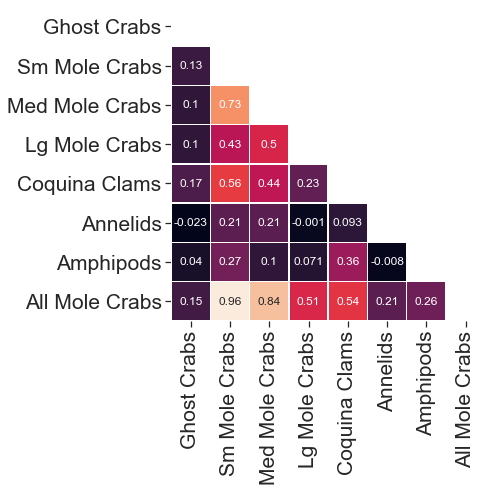

In [145]:
fig15 = plt.figure(figsize=(7,7))

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor, annot=True, mask=mask, cbar=False, linewidth=0.5)    # , fmt='d'
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

plt.tight_layout()
plt.savefig(plot_path+'Correlation Map.png');

In [26]:
# MEDIANS: (df.describe() would do this, too)

df.loc[(df['Survey'] == '2014-07') & (df['Group'] == 'Control')].median(axis=0)

Ghost Crabs        2.0
Sm Mole Crabs     51.0
Med Mole Crabs     5.0
Lg Mole Crabs      1.0
Coquina Clams      0.0
Annelids           0.0
Amphipods          0.0
All Mole Crabs    62.0
dtype: float64

In [27]:
def add_one(x):
    return(x+1)

def compute_median_absolute_deviation(x):
    median_x = np.median(x)
    del_x = abs(x - median_x)
    MAD = np.median(del_x)
    return(MAD)


ccc = pd.DataFrame([[4,9,5,1,6]] * 3, columns=['A', 'B', 'C', 'D', 'E'])
print(ccc)

ccc.apply(lambda x: compute_median_absolute_deviation(x), axis=0, result_type='expand')

   A  B  C  D  E
0  4  9  5  1  6
1  4  9  5  1  6
2  4  9  5  1  6


A    0.0
B    0.0
C    0.0
D    0.0
E    0.0
dtype: float64

In [28]:
# MEASURES OF SPREAD:

import scipy.stats as sps

# MAD = Median Absolute Deviation:
def compute_MAD(x):
    return(sps.median_abs_deviation(x, axis=1, center=np.median, scale='normal', nan_policy='propagate'))
    
def compute_median_absolute_deviation(x):
    median_x = np.median(x)
    del_x = abs(x - median_x)
    MAD = np.median(del_x)
    #print('record:',MAD)
    return(MAD)

def compute_normalized_median_absolute_deviation(x):
    median_x = np.median(x)
    del_x = abs(x - median_x)
    nMAD = 1.4826 * np.median(del_x)
    return(nMAD)

def compute_robust_coefficient_variation(x):
    median_x = np.median(x)
    del_x = abs(x - median_x)
    if median_x == 0.0:
        RCV = 0.0
    else:
        RCV = 1.4826 * np.median(del_x)/median_x
    return(RCV)


#df_mad = df.groupby(by=['Survey', 'Group']).agg(compute_median_absolute_deviation)
df_rcv = df.groupby(by=['Survey', 'Group']).agg(compute_robust_coefficient_variation)

#df_mad.reset_index(inplace=True)
df_rcv.reset_index(inplace=True)

#df_mad
#df_rcv

In [136]:
# COMPUTE SOME SPREADS:

surveys = ['2014-07','2014-09','2015-04','2015-08','2015-10','2016-02','2016-05','2016-08','2016-10',
          '2017-02','2017-04','2017-08','2020-01','2020-04','2020-07']
groups = ['Control','Impacted']
animals = ['Ghost Crabs','Sm Mole Crabs','Med Mole Crabs','Lg Mole Crabs','All Mole Crabs']

cols = ['Survey', 'Group', 'Animal','Std Dev','CV', 'Range', 'Median', 'MAD', 'nMAD', 'RCV']

surveyL=[]; groupL=[]; animaL=[]; std_dev=[]; CV=[]; rnge=[]; median_x=[]; MAD=[]; nMAD=[]; RCV=[]

for survey in surveys:
    for group in groups:
        for animal in animals:
            x = df[animal].loc[(df['Survey'] == survey) & (df['Group'] == group)]
            surveyL.append(survey)
            groupL.append(group)
            animaL.append(animal)
            
            std_dev.append( round(np.std(x),3) )
            
            if(np.mean(x) == 0.0):
                CV.append(0.000)
            else:
                CV.append( round(np.std(x)/np.mean(x),3) )
                
            median_x.append( np.median(x) )
            del_x = abs(x - np.median(x) )
            MAD.append( np.median(del_x) )
            madx = 1.4826 * np.median(del_x)
            nMAD.append( round(madx, 3) )
            rnge.append( x.max() - x.min() )
            
            if np.median(x) == 0.0:
                RCV.append( 0.0 )
            else:
                RCV.append( (1.4826 * np.median(del_x)/np.median(x)) )
                
            #print('record:', survey, group, animal, rnge, std_dev, median_x, MAD, nMAD, RCV) #, del_x, MAD)
            
df_var = pd.DataFrame({'Survey':surveyL, 'Group':groupL, 'Animal':animaL,'Std Dev':std_dev,'CV':CV, 'Range':rnge,
                      'Median':median_x, 'MAD':MAD, 'nMAD':nMAD, 'RCV':RCV})

#df_var

In [137]:
var_table = pd.pivot_table(df_var, values=['CV','RCV'] ,index=['Survey','Group'], columns=['Animal'])

cv_table = var_table['CV'] 
rcv_table = var_table['RCV']

In [138]:
cv_table.index[0][1]

'Control'

<Figure size 1008x1008 with 0 Axes>

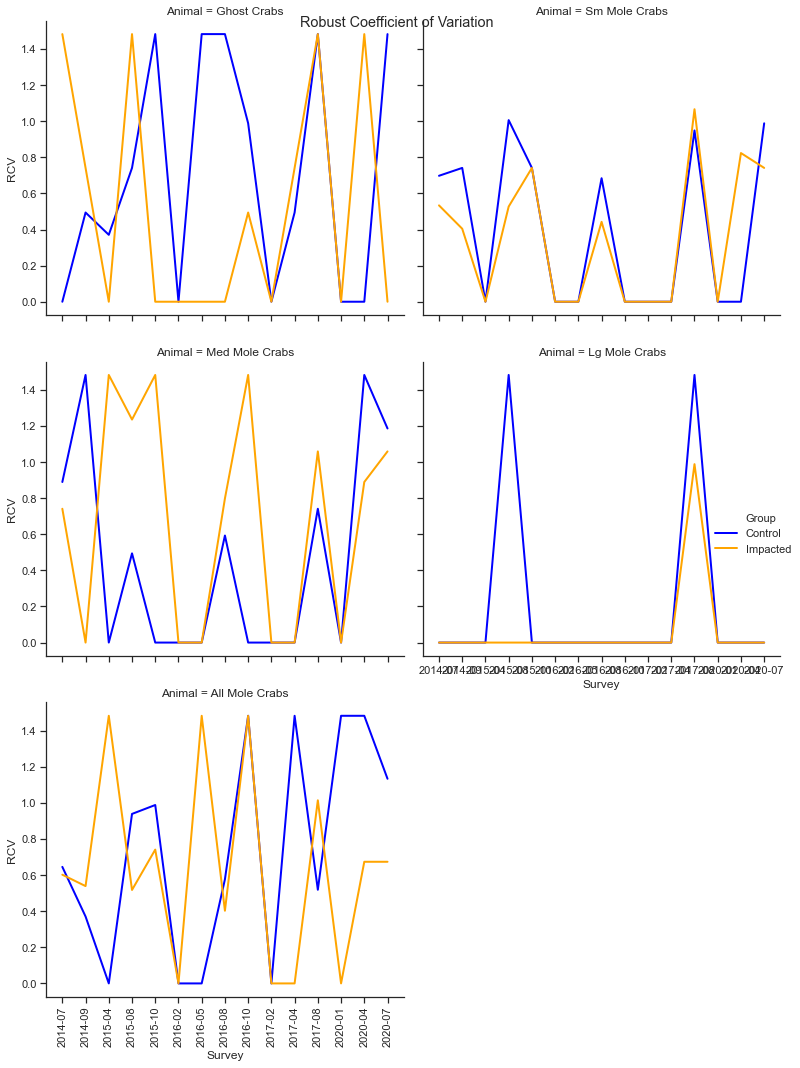

In [139]:
fig16 = plt.figure(figsize=(14,14))
#axs = fig16.subplots(nrows=3, ncols=2)

sns.relplot(
    data=df_var, x="Survey", y="RCV",
    col="Animal", hue="Group", 
    size='Group',
    kind="line",
    markers=['O','o'],
    col_wrap=2,palette=["blue", "orange"],
    sizes=(2, 2),legend='brief'
    )
plt.xticks(rotation=90)
plt.suptitle('Robust Coefficient of Variation')
plt.tight_layout();
 #style="day",   


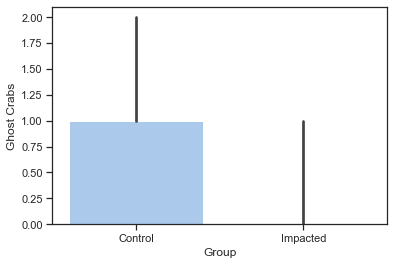

In [33]:
sns.barplot(x='Group',y='Ghost Crabs', data=df, estimator=np.median, ci=95)

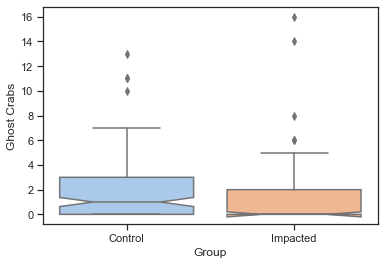

In [34]:
sns.boxplot(x='Group',y='Ghost Crabs', data=df, notch=True)

## Abundance trends by species thru time:

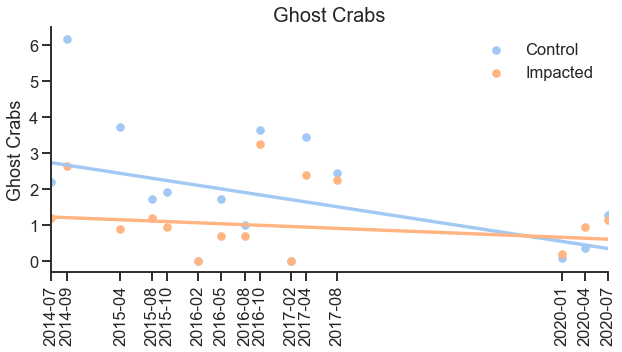

In [212]:
sns.lmplot(x='DateJ', y='Ghost Crabs', hue='Group', data=df, ci=None, x_estimator=np.mean, 
           robust=True, legend=False, height=5, aspect=1.75)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Ghost Crabs', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Ghost_Crabs.png');

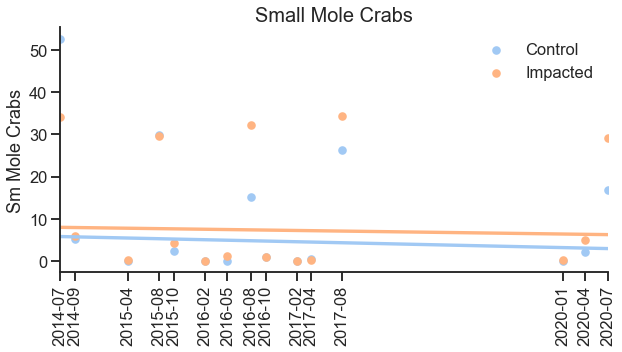

In [211]:
sns.lmplot(x='DateJ', y='Sm Mole Crabs', hue='Group', data=df, ci=None, x_estimator=np.mean, 
           robust=True, legend=False, height=5, aspect=1.75)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Small Mole Crabs', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Small_Mole_Crabs.png');

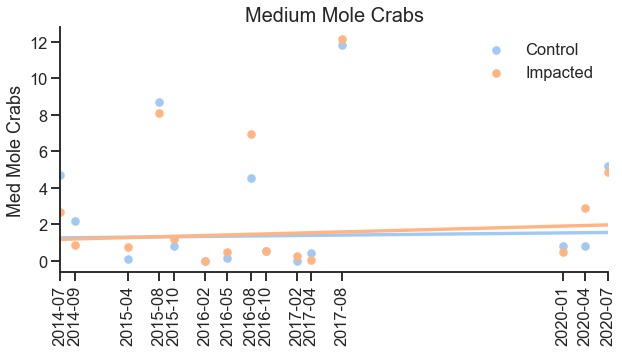

In [210]:
sns.lmplot(x='DateJ', y='Med Mole Crabs', hue='Group', data=df, ci=None, x_estimator=np.mean, 
           robust=True, legend=False, height=5, aspect=1.75)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Medium Mole Crabs', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Medium_Mole_Crabs.png');

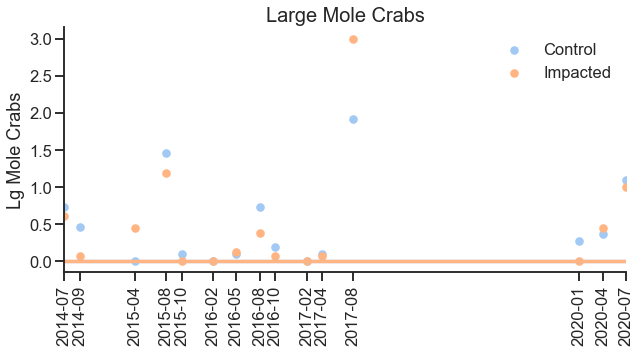

In [209]:
sns.lmplot(x='DateJ', y='Lg Mole Crabs', hue='Group', data=df, ci=None, x_estimator=np.mean,
           robust=True, legend=False, height=5, aspect=1.8)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Large Mole Crabs', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Large_Mole_Crabs.png');

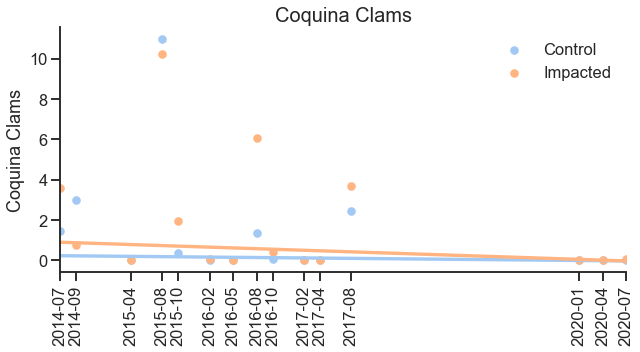

In [208]:
sns.lmplot(x='DateJ', y='Coquina Clams', hue='Group', data=df, ci=None, x_estimator=np.mean,
           robust=True, legend=False, height=5, aspect=1.8)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Coquina Clams', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Coquina_Clams.png');

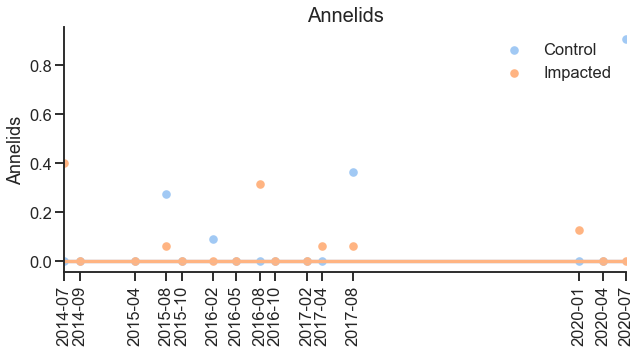

In [207]:
sns.lmplot(x='DateJ', y='Annelids', hue='Group', data=df, ci=None, x_estimator=np.mean,
           robust=True, legend=False, height=5, aspect=1.8)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Annelids', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Annelids.png');

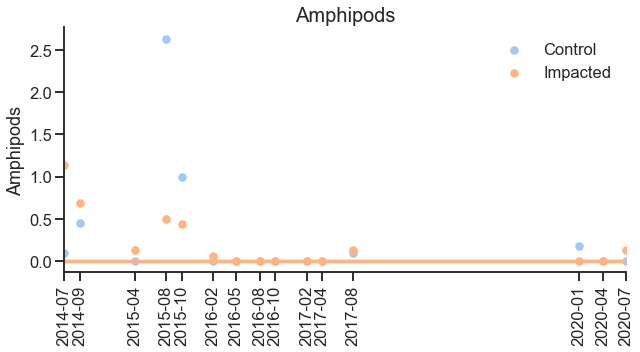

In [206]:
sns.lmplot(x='DateJ', y='Amphipods', hue='Group', data=df, ci=None, x_estimator=np.mean,
           robust=True, legend=False, height=5, aspect=1.8)    #col_wrap=3

plt.xticks(xtics, xticlbls, rotation=90)
plt.xlabel('')
plt.title('Amphipods', fontsize=20)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig(plot_path+'TRENDS_Amphipods.png');